**Set environment**

In [1]:
### basic
import sys
sys.path.append('../')
from config_sing import *
from config_func import *

### specific tools
from collections import defaultdict
from functools import reduce
import itertools as it
import sqlite3
# https://stackoverflow.com/questions/49456158/integer-in-python-pandas-becomes-blob-binary-in-sqlite
sqlite3.register_adapter(np.int64, lambda val: int(val))
sqlite3.register_adapter(np.int32, lambda val: int(val))

### file path of fragment database
fdiry = os.path.join(FD_RES, "KS91_K562_ASTARRseq", 'database')
fname = "fragment_astarr_gata1.db"
FPATH_DB_ASTARR = os.path.join(fdiry, fname)

fdiry = os.path.join(FD_RES, "Tewhey_K562_TileMPRA", 'database')
fname = "fragment_tilempra_gata1.db"
FPATH_DB_TMPRA = os.path.join(fdiry, fname)

FPATHS_DB = [FPATH_DB_ASTARR, FPATH_DB_TMPRA]

You are on Duke Server: Singularity: Proj ENCODE FCC
BASE DIRECTORY:     /mount/work
PATH OF SOURCE:     /mount/work/source
PATH OF EXECUTABLE: /mount/work/exe
PATH OF ANNOTATION: /mount/work/annotation
PATH OF PROJECT:    /mount/project
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc



In [2]:
from umap             import UMAP
from sklearn.manifold import TSNE

In [3]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
fname = "dat_annot_TileMPRA.csv"
fpath = os.path.join(fdiry, fname)
dat_ant = pd.read_csv(fpath)

print(dat_ant.shape)
dat_ant.head()

(52312, 273)


,Fragment,Mtf_KLF/SP/2,Mtf_ZNF28,Mtf_FOX/4,Mtf_ZNF382,Mtf_ZNF136,Mtf_ZNF41,Mtf_IRF/1,Mtf_RUNX/2,Mtf_ZNF320,...,Mtf_BCL6/1,Mtf_MYB/4,Mtf_HD/1,Mtf_HIF,Mtf_ZNF306,Mtf_ZNF547,Mtf_ZNF713,Mtf_GMEB2/1,Mtf_HINFP1/2,Mtf_ZBED1
0,chrX_47786401_47786600,6.700100,15.9435,8.4743,24.6662,2.6078,7.1286,5.3024,8.9312,5.6607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chrX_47786951_47787150,5.008633,0.0000,8.4158,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chrX_47787001_47787200,11.829133,0.0000,8.4158,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chrX_47787051_47787250,11.829133,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chrX_47787101_47787300,11.829133,0.0000,8.8403,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
dat = dat_ant.loc[:,["Fragment"]]
dat[['Chrom', 'Start', 'End']] = dat['Fragment'].str.split('_', expand=True)
dat = dat.astype({"Start": int, "End": int})
dat = dat.assign(Loc = lambda x: np.ceil((x.Start + x.End) / 2))
dat = dat.astype({"Loc": int})
dat_frg = dat

print(dat.shape)
dat.head()

(52312, 5)


,Fragment,Chrom,Start,End,Loc
0,chrX_47786401_47786600,chrX,47786401,47786600,47786501
1,chrX_47786951_47787150,chrX,47786951,47787150,47787051
2,chrX_47787001_47787200,chrX,47787001,47787200,47787101
3,chrX_47787051_47787250,chrX,47787051,47787250,47787151
4,chrX_47787101_47787300,chrX,47787101,47787300,47787201


In [15]:
dat   = dat_ant.drop(columns="Fragment")
X_ori = dat.to_numpy()
print(X_ori.shape)

(52312, 272)


In [6]:
SEED = 123
ump = UMAP(random_state=SEED)
tsn = TSNE(init="pca")

In [7]:
%%time
X_ump = ump.fit_transform(X)

CPU times: user 1min 7s, sys: 1.72 s, total: 1min 8s
Wall time: 1min 3s


In [8]:
%%time
X_tsn = tsn.fit_transform(X)

CPU times: user 10min 46s, sys: 22.9 s, total: 11min 9s
Wall time: 6min 29s


## visualize

In [21]:
np.random.seed(123)

X      = X_ori
n      = 100000
n_rows = X.shape[0]
idx    = np.arange(n_rows)
i      = np.random.choice(idx, size=n)

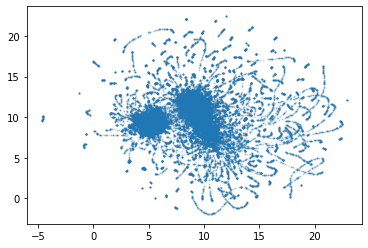

In [22]:
fig, ax = plt.subplots()
X = X_ump
x = X[i,0]
y = X[i,1]
im = ax.scatter(x, y, s=0.5, alpha = 0.1)

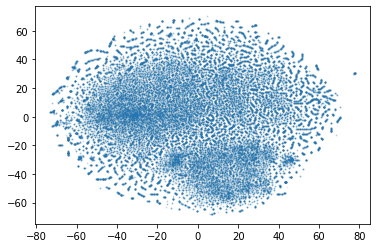

In [23]:
fig, ax = plt.subplots()
X = X_tsn
x = X[i,0]
y = X[i,1]
im = ax.scatter(x, y, s=0.5, alpha = 0.1)

In [24]:
j = dat_ant.columns.str.startswith("Mtf_GATA")
c = dat_ant.iloc[i,j].values.ravel()
print(np.sum(j))

1


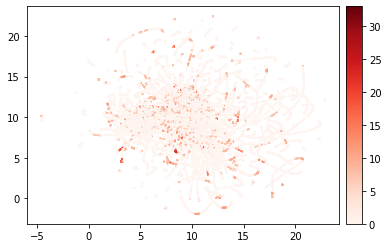

In [27]:
fig, ax = plt.subplots()
X = X_ump
x = X[i,0]
y = X[i,1]
im = ax.scatter(x, y, s=0.5, c=c, cmap="Reds")
set_colorbar(ax, im)

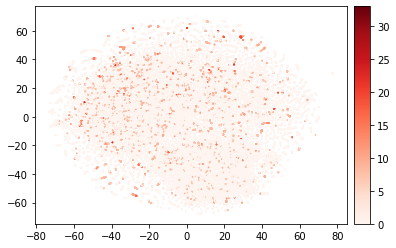

In [29]:
fig, ax = plt.subplots()
X = X_tsn
x = X[i,0]
y = X[i,1]
im = ax.scatter(x, y, s=0.5, c=c, cmap="Reds")
set_colorbar(ax, im)